# Analyse statistique: corrélations

Projet EPFL/Pully/Swisscom

Ce fichier sert à calculer les corrélations statistiques entre les différentes sources de données, et à générer quelques graphiques


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
sns.set()
sns.set_color_codes()
from pandas import Series, DataFrame
from importlib import reload
from IPython.display import display, Markdown, Latex, HTML
from scipy.stats import pearsonr, spearmanr, chisquare
import data_utils as du

In [2]:
from importdata import *

#fichiers
ped_file = '../pietons_110918_270918.csv' #fichier piétons
sc_file = 'scmodes_1209-2609.csv' #fichier swisscom
veh_file = '../110918_270918.csv' #fichier vehicules
tl_file = '../TL/tl_sep2018.xlsx'#fichier TL

#periode de calcul
start = pd.to_datetime('09/12/2018 00:00')
end = pd.to_datetime('09/26/2018 23:00') #4 septembre

#importation des fichiers
ped_data = importPed(ped_file,start,end)

veh_data = importVeh(veh_file,start,end)
sc_data = importSC(sc_file, start,end, mode=True)

sc_data.drop('Total', axis=1, inplace = True)
sc_data.rename(columns={'Road': 'Total'}, inplace = True)

tl_data = importTL(tl_file, start, end, sheet = 1)


## Corrélations de Pearson

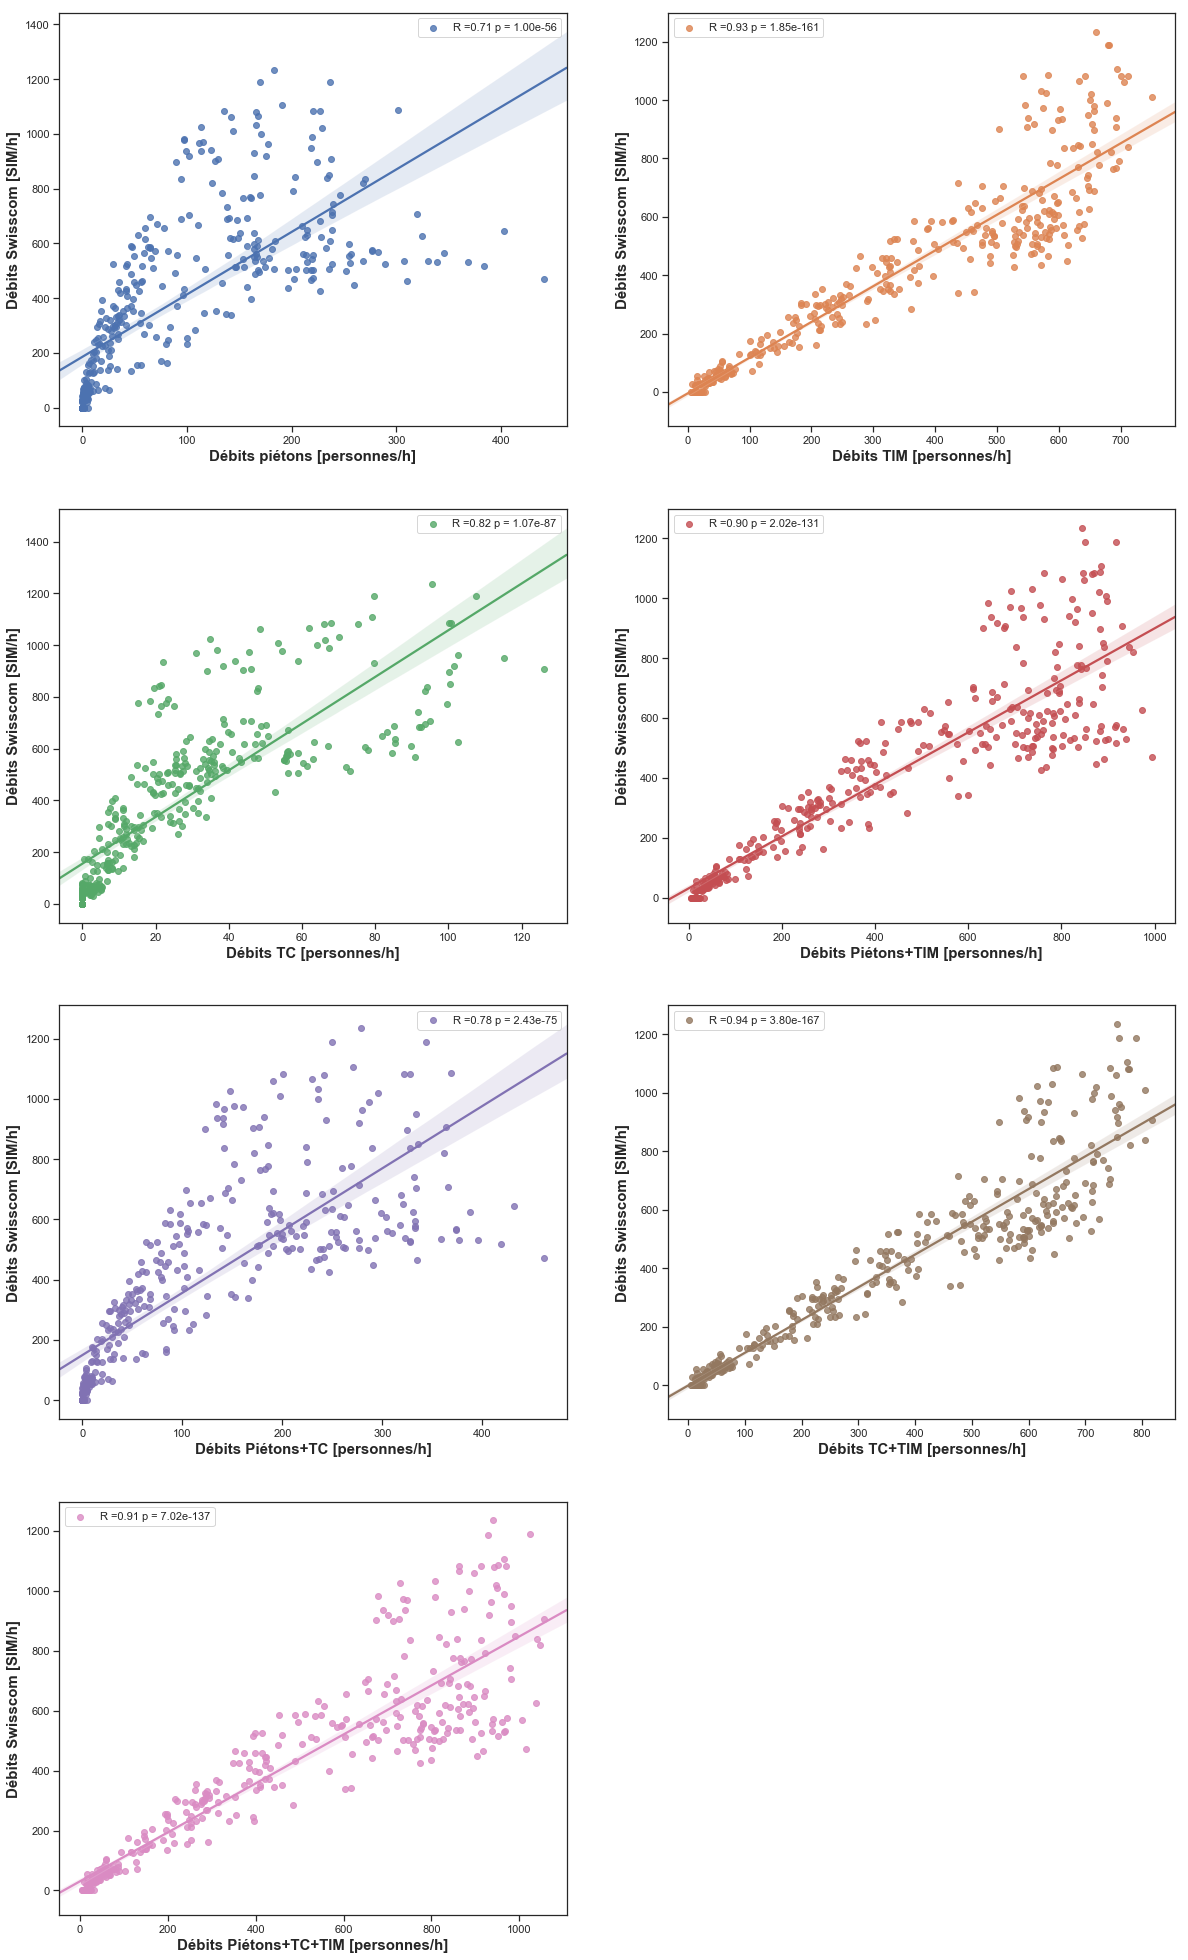

In [3]:
sns.set_style('ticks')
ped = ped_data[['Date','Total']]
sc = sc_data[['Date','Total']]
veh = veh_data[['Date','Total']]
tl = tl_data[['Date','Total']]

bigd = ped.set_index('Date').join(veh.set_index('Date'), lsuffix = "_piet", rsuffix ="_veh")
bigd = bigd.join(tl.set_index('Date'), rsuffix = "_tl")
bigd =bigd.join(sc.set_index('Date'), rsuffix ="_sc")
bigd.rename(columns={"Total_piet": "Pietons", "Total_veh": 'TIM', "Total": "TC", "Total_sc": "Swisscom" }, inplace=True)
bigd['TIM']=np.multiply(1.1, bigd.TIM)
bigd['PietVeh'] = bigd.Pietons + bigd.TIM
bigd['PietTC']= bigd.Pietons + bigd.TC
bigd['TCTIM']= bigd.TC + bigd.TIM
bigd['PietTCTIM'] =  bigd.TC + bigd.TIM +bigd.Pietons

r, p = pearsonr(bigd.Pietons, bigd.Swisscom)
label1 = "R ={:.2f} p = {:.2e}".format(r,p)
r, p = pearsonr(bigd.TIM, bigd.Swisscom)
label2 = "R ={:.2f} p = {:.2e}".format(r,p)
r, p = pearsonr(bigd.TC, bigd.Swisscom)
label3 = "R ={:.2f} p = {:.2e}".format(r,p)
r, p = pearsonr(bigd.PietVeh, bigd.Swisscom)
label4 = "R ={:.2f} p = {:.2e}".format(r,p)
r, p = pearsonr(bigd.PietTC, bigd.Swisscom)
label5 = "R ={:.2f} p = {:.2e}".format(r,p)
r, p = pearsonr(bigd.TCTIM, bigd.Swisscom)
label6 = "R ={:.2f} p = {:.2e}".format(r,p)
r, p = pearsonr(bigd.PietTCTIM, bigd.Swisscom)
label7 = "R ={:.2f} p = {:.2e}".format(r,p)

palette = sns.color_palette("deep",8)

#Corrélation Swisscom/Piétons
f = plt.figure(figsize=[20,35])
ax1 = f.add_subplot(421)
sns.regplot('Pietons', 'Swisscom', data = bigd, ax = ax1, color = palette[0], label = label1)
ax1.legend(loc='best')
ax1.set_title("Piétons vs Swisscom", {'fontweight':'bold'})
ax1.set_xlabel("Débits piétons [personnes/h]", fontsize = 15, fontweight = 'bold')
ax1.set_ylabel("Débits Swisscom [SIM/h]", fontsize = 15, fontweight = 'bold')

#Corrélation Swisscom/TIM
ax2 = f.add_subplot(422)
sns.regplot('TIM', 'Swisscom', data = bigd, ax = ax2, color = palette[1], label = label2)
ax2.legend(loc='best')
ax2.set_title("TIM vs Swisscom", {'fontweight':'bold'})
ax2.set_xlabel("Débits TIM [personnes/h]", fontsize = 15, fontweight = 'bold')
ax2.set_ylabel("Débits Swisscom [SIM/h]", fontsize = 15, fontweight = 'bold')

#Corrélation Swisscom/TC
ax3 = f.add_subplot(423)
sns.regplot('TC', 'Swisscom', data = bigd, ax = ax3, color = palette[2], label = label3)
ax3.legend(loc='best')
ax3.set_title("TC vs Swisscom", {'fontweight':'bold'})
ax3.set_xlabel("Débits TC [personnes/h]", fontsize = 15, fontweight = 'bold')
ax3.set_ylabel("Débits Swisscom [SIM/h]", fontsize = 15, fontweight = 'bold')

#Corrélation Swisscom/ Piétons+TIM
ax4 = f.add_subplot(424)
sns.regplot('PietVeh', 'Swisscom', data = bigd, ax = ax4, color = palette[3], label = label4)
ax4.legend(loc='best')
ax4.set_title("Pietons+TIM vs Swisscom", {'fontweight':'bold'})
ax4.set_xlabel("Débits Piétons+TIM [personnes/h]",fontsize = 15, fontweight = 'bold')
ax4.set_ylabel("Débits Swisscom [SIM/h]",fontsize = 15, fontweight = 'bold')

#Corrélation Swisscom/Piétons+TC
ax5 = f.add_subplot(425)
sns.regplot('PietTC', 'Swisscom', data = bigd, ax = ax5, color = palette[4], label = label5)
ax5.legend(loc='best')
ax5.set_title("Pietons+TC vs Swisscom", {'fontweight':'bold'})
ax5.set_xlabel("Débits Piétons+TC [personnes/h]",fontsize = 15, fontweight = 'bold')
ax5.set_ylabel("Débits Swisscom [SIM/h]",fontsize = 15, fontweight = 'bold')

#Corrélation Swisscom/TC+TIM
ax6 = f.add_subplot(426)
sns.regplot('TCTIM', 'Swisscom', data = bigd, ax = ax6, color = palette[5], label = label6)
ax6.legend(loc='best')
ax6.set_title("TC+TIM vs Swisscom", {'fontweight':'bold'})
ax6.set_xlabel("Débits TC+TIM [personnes/h]",fontsize = 15, fontweight = 'bold')
ax6.set_ylabel("Débits Swisscom [SIM/h]",fontsize = 15, fontweight = 'bold')

#Corrélation Swisscom/Tous les capteurs
ax7 = f.add_subplot(427)
sns.regplot('PietTCTIM', 'Swisscom', data = bigd, ax = ax7, color = palette[6], label = label7)
ax7.legend(loc='best')
ax7.set_title("Pietons+TC+TIM vs Swisscom", {'fontweight':'bold'})
ax7.set_xlabel("Débits Piétons+TC+TIM [personnes/h]",fontsize = 15, fontweight = 'bold')
ax7.set_ylabel("Débits Swisscom [SIM/h]",fontsize = 15, fontweight = 'bold')

plt.show()


### Matrice de correlation

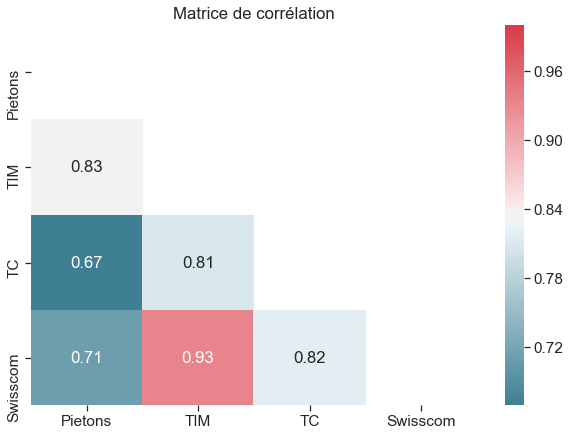

In [5]:
sns.set(font_scale = 1.4)
sns.set_style('ticks')
df = bigd.copy()
corr = df[['Pietons', 'TIM', 'TC', 'Swisscom']].corr()

cov = df[['Pietons', 'TIM', 'TC', 'Swisscom']].cov()

# matrice de correlation
fig, ax = plt.subplots(figsize=(10, 7))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=colormap, annot=True, fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()



### Comparaison des débits horaires

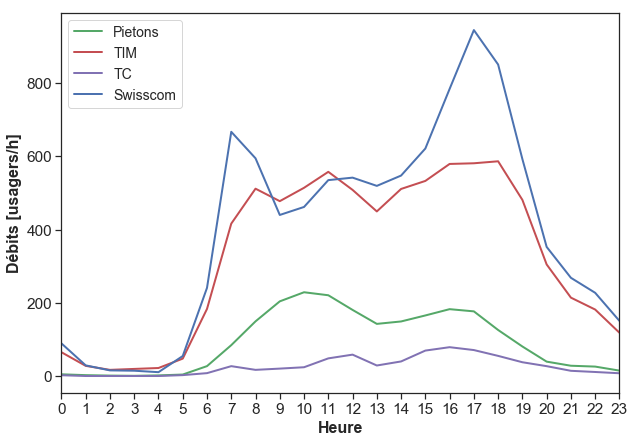

In [6]:
sns.set_style('ticks')
df_cs = df[['Pietons', 'TIM', 'TC', 'Swisscom']].copy()
df_cs.reset_index(inplace=True)
df_cs = df_cs.groupby(df_cs.Date.dt.hour).mean()
df_cs['Heure'] = np.arange(0,24)
df_cs['Total'] = df_cs['Pietons'] + df_cs['TIM'] + df_cs['TC']
df_cs.reset_index(inplace = True)

colors = ['g', 'r', 'm', 'b']
df_cs.plot(x='Heure', y = ['Pietons', 'TIM', 'TC', 'Swisscom'], kind='line', figsize=[10,7], linewidth = 2, color=colors)
plt.xlim([0,23])
plt.ylabel("Débits [usagers/h]", {'fontweight': 'bold', 'fontsize': 16})
plt.xlabel("Heure", {'fontweight': 'bold', 'fontsize': 16})
plt.xticks(np.arange(0,24,1))
plt.legend(loc='upper left', fontsize=14)
plt.show()

### Comparaison des débits cumulés

In [ ]:
df_cs = df_cs.cumsum(axis =0)
df_cs['Heure'] = np.arange(0,24)


df_cs.plot(x='Heure', y = ['Swisscom', 'Total'], kind='line', figsize = [10, 7], linewidth = 2)
plt.title('Comparaison des débits cumulés')
plt.ylabel('Débits cumulés [usagers/h]',{'fontweight': 'bold', 'fontsize': 16})
plt.xlabel("Heure", {'fontweight': 'bold', 'fontsize': 16})
plt.xlim([0,23])
plt.xticks(np.arange(0,24,1))
plt.legend(loc='upper left', fontsize=14)
plt.show()
